In [1]:
# import essential modules.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot as plt
import os

In [2]:
# Change current directory to the specified path '/Users/liang/Downloads/FYP/FYP-Documents'.
os.chdir('/Users/liang/Downloads/FYP/FYP-Documents')
# Read the dataset 'porus_0.7.csv' and 'permeability_0.7.csv'
# from the directory '/Users/liang/Downloads/FYP/FYP-Documents'.
x = pd.read_csv('porus_0.7.csv')
y = pd.read_csv('permeability_0.7.csv')
# Show some samples in the datasets
display(x[0:5])
display(y[0:5])

,iswall_cell_r_1,iswall_cell_r_2,iswall_cell_r_3,iswall_cell_r_4,iswall_cell_r_5,iswall_cell_r_6,iswall_cell_r_7,iswall_cell_r_8,iswall_cell_r_9,iswall_cell_r_10,...,iswall_cell_r_2491,iswall_cell_r_2492,iswall_cell_r_2493,iswall_cell_r_2494,iswall_cell_r_2495,iswall_cell_r_2496,iswall_cell_r_2497,iswall_cell_r_2498,iswall_cell_r_2499,iswall_cell_r_2500
0,0,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,0,1
1,1,1,1,0,0,1,0,1,1,0,...,1,1,1,1,0,1,0,1,1,1
2,1,0,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,0
3,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,0,1,0,...,1,0,0,1,1,1,1,0,1,1


,effPerm_m_1,effPerm_m_2,effPerm_m_3,effPerm_m_4
0,1.514117,-0.069671,-0.069495,1.247416
1,1.320672,-0.050432,-0.050393,1.731229
2,1.489324,-0.246181,-0.246071,1.321387
3,1.242443,0.037962,0.038646,1.583838
4,1.880798,0.067746,0.067822,1.217627


[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]]


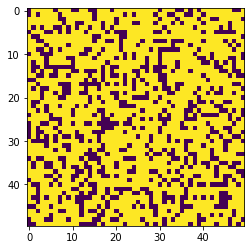

Identify the size of x_train, y_train, x_test, y_test:
x_train, size:(8000, 50, 50, 1).
y_train, size:(8000, 4).
x_test, size:(2000, 50, 50, 1).
y_test, size:(2000, 4).


In [3]:
# Change x_data and y_data into float32.
x = np.array(x)
x = x.astype(np.float32)
y = np.array(y)
y = y.astype(np.float32)
# Reshape the input variable x_data from [10000*2500] to [10000,50,50,1]
x = np.reshape(x,[-1,50,50,1]) 
# Output a soil structure sample from x.
sample = x[0,:,:,0]
print(sample)
plt.imshow(sample, interpolation='nearest')
plt.show()
# Scramble the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=116)
print('Identify the size of x_train, y_train, x_test, y_test:' + '\n'
      'x_train, size:' + str(x_train.shape) + '.\n'
      'y_train, size:' + str(y_train.shape) + '.\n'
      'x_test, size:' + str(x_test.shape) + '.\n'
      'y_test, size:' + str(y_test.shape) + '.')

In [4]:
# Build neural network model
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(input_shape=(50, 50, 1), kernel_size=(3, 3), filters=4, activation=None)
        self.c2 = Conv2D(kernel_size=(3,3),filters=4, activation='relu')
        self.p1 = AveragePooling2D(pool_size=(2,2), strides=2)
        self.c3 = Conv2D(kernel_size=(3, 3), filters=4,  activation=None)
        self.c4 = Conv2D(kernel_size=(3, 3), filters=4,  activation='relu')
        self.p2 = AveragePooling2D(pool_size=(2,2), strides=2)
        self.flatten = Flatten()
        self.f1 = Dense(136)
        self.f2 = Dense(64)
        self.f3 = Dense(4)

    def call(self, x):
        x = self.c1(x)
        x = self.c2(x)
        x = self.p1(x)

        x = self.c3(x)
        x = self.c4(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x) # Output
        return y
    
model = LeNet5()
adam = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss='mean_squared_error', optimizer='adam', metrics='RootMeanSquaredError')

In [5]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=8, min_lr=0.0003)
history = model.fit(x_train, y_train, batch_size=40, epochs=50,
                    validation_data=(x_test,y_test))
model.summary()

Epoch 1/50
200/200 [==============================] - 11s 49ms/step - loss: 0.1374 - root_mean_squared_error: 0.3479 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2136
Epoch 2/50
200/200 [==============================] - 9s 44ms/step - loss: 0.0483 - root_mean_squared_error: 0.2197 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2048
Epoch 3/50
200/200 [==============================] - 8s 42ms/step - loss: 0.0469 - root_mean_squared_error: 0.2164 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 4/50
200/200 [==============================] - 8s 42ms/step - loss: 0.0447 - root_mean_squared_error: 0.2113 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2058
Epoch 5/50
200/200 [==============================] - 8s 41ms/step - loss: 0.0432 - root_mean_squared_error: 0.2078 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1965
Epoch 6/50
200/200 [==============================] - 8s 42ms/step - loss: 0.0414 - root_mean_squared_error: 0.2036 - val_loss: 0.0379

200/200 [==============================] - 8s 39ms/step - loss: 0.0320 - root_mean_squared_error: 0.1788 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2153
Epoch 49/50
200/200 [==============================] - 8s 38ms/step - loss: 0.0326 - root_mean_squared_error: 0.1805 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1766
Epoch 50/50
200/200 [==============================] - 8s 40ms/step - loss: 0.0317 - root_mean_squared_error: 0.1781 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1800
Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  40        
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  148       
_________________________________________________________________
average_pooling2d (AveragePo multiple                  0         
___________

In [6]:
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'
dfhistory

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
epoch,,,,
1,0.068794,0.262287,0.045624,0.213599
2,0.048149,0.219429,0.041926,0.204757
3,0.046277,0.215120,0.039817,0.199543
4,0.044884,0.211858,0.042344,0.205776
5,0.043316,0.208125,0.038604,0.196480
6,0.041531,0.203792,0.037858,0.194571
7,0.039945,0.199863,0.038430,0.196037
8,0.041204,0.202988,0.036640,0.191417
9,0.039649,0.199122,0.036280,0.190473


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs[1:], train_metrics[1:], 'bo--')
    plt.plot(epochs[1:], val_metrics[1:], 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric, 'val_'+metric])
    plt.savefig('result_lr=0.5.jpg')
    plt.show()

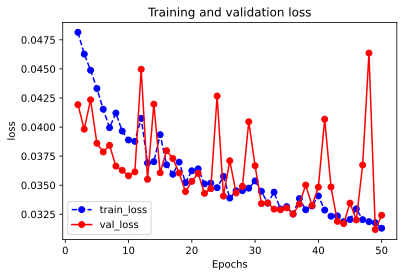

In [8]:
plot_metric(history,"loss")

In [10]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred, multioutput='raw_values')
r2_score(y_test,y_pred)

0.12592483401428542

In [11]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 9ms/step - loss: 0.0324 - root_mean_squared_error: 0.1800


[0.03241666033864021, 0.18004627525806427]

In [ ]:
x1 = pd.read_csv('porus_0.8.csv')
y1 = pd.read_csv('permeability_0.8.csv')
x1 = np.array(x1)
x1 = x1.astype(np.float32)
y1 = np.array(y1)
y1 = y1.astype(np.float32)
# Reshape the input variable x_data from [10000*2500] to [10000,50,50,1]
x1 = np.reshape(x1,[-1,50,50,1]) 
y_pred1 = model.predict(x1)
print(str(y_pred1.shape),str(y1.shape))

In [ ]:
r2_score(y1[0:2000], y_pred1[0:2000], multioutput='raw_values')

In [ ]:
model.save_weights('/Users/liang/Documents/FYP-Model_weights/')

(10000, 4) (10000, 4)


In [13]:
r2_score(y1[0:2000], y_pred1[0:2000], multioutput='raw_values')

array([-1.24884777e+01, -4.46404562e-03,  4.85999480e-03, -1.34495278e+01])

In [25]:
model.save_weights('/Users/liang/Documents/FYP-Model_weights/')